# 第四回：文字图例尽眉目

In [27]:
import matplotlib
import matplotlib.pyplot as plt

## 一、Figure和Axes上的文本

Matplotlib具有广泛的文本支持，包括对数学表达式的支持、对栅格和矢量输出的TrueType支持、具有任意旋转的换行分隔文本以及Unicode支持。

### 1.文本API示例

下面的命令是介绍了通过pyplot API和objected-oriented API分别创建文本的方式。

| pyplot API | OO API  | description  |
| ---------- | ------- | ------------ |
| `text` | `text` | 在子图axes的任意位置添加文本|
| `annotate` | `annotate` | 在子图axes的任意位置添加注解，包含指向性的箭头|
| `xlabel` | `set_xlabel` | 为子图axes添加x轴标签 |
| `ylabel` | `set_ylabel` | 为子图axes添加y轴标签 |
| `title` | `set_title` | 为子图axes添加标题 |
| `figtext` | `text` | 在画布figure的任意位置添加文本  |
| `suptitle` | `suptitle` | 为画布figure添加标题 |

通过一个综合例子，以OO模式展示这些API是如何控制一个图像中各部分的文本，在之后的章节我们再详细分析这些api的使用技巧

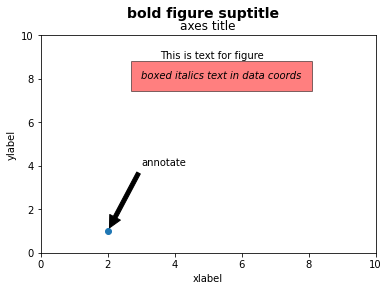

In [28]:

fig = plt.figure()
ax = fig.add_subplot()


# 分别为figure和ax设置标题，注意两者的位置是不同的
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

# 设置x和y轴标签
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# 设置x和y轴显示范围均为0到10
ax.axis([0, 10, 0, 10])

# 在子图上添加文本
ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# 在画布上添加文本，一般在子图上添加文本是更常见的操作，这种方法很少用
fig.text(0.4,0.8,'This is text for figure')

ax.plot([2], [1], 'o')
# 添加注解
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),arrowprops=dict(facecolor='black', shrink=0.05));

### 2.text - 子图上的文本

text的调用方式为`Axes.text(x, y, s, fontdict=None, **kwargs) `  
其中`x`,`y`为文本出现的位置，默认状态下即为当前坐标系下的坐标值，  
`s`为文本的内容，  
`fontdict`是可选参数，用于覆盖默认的文本属性，  
`**kwargs`为关键字参数，也可以用于传入文本样式参数

重点解释下fontdict和\*\*kwargs参数，这两种方式都可以用于调整呈现的文本样式，最终效果是一样的，不仅text方法，其他文本方法如set_xlabel,set_title等同样适用这两种方式修改样式。通过一个例子演示这两种方法是如何使用的。

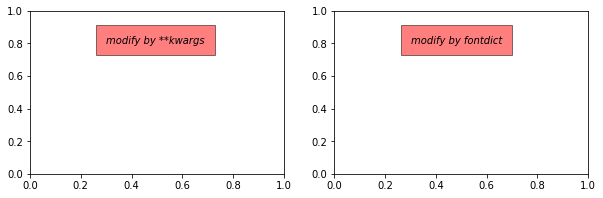

In [46]:
fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,2)

# 使用关键字参数修改文本样式
axes[0].text(0.3, 0.8, 'modify by **kwargs', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10});

# 使用fontdict参数修改文本样式
font = {'bbox':{'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, 'style':'italic'}
axes[1].text(0.3, 0.8, 'modify by fontdict', fontdict=font);

matplotlib中所有支持的样式参数请参考[官网文档说明](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text)，大多数时候需要用到的时候再查询即可。  

下表列举了一些常用的参数供参考。

| Property                      | Description                                |
| ------------------------ | :-------------------------- |
| `alpha` |float or None   透明度，越接近0越透明，越接近1越不透明   |                           
| `backgroundcolor` | color  文本的背景颜色                   |
| `bbox` | dict with properties for patches.FancyBboxPatch 用来设置text周围的box外框 |
| `color` or c | color 字体的颜色             |
| `fontfamily` or family | {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'} 字体的类型|
| `fontsize` or size | float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'} 字体大小|
| `fontstyle` or style | {'normal', 'italic', 'oblique'} 字体的样式是否倾斜等     |
| `fontweight` or weight | {a numeric value in range 0-1000, 'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'} 文本粗细|         
| `horizontalalignment` or ha | {'center', 'right', 'left'}  选择文本左对齐右对齐还是居中对齐         |
| `linespacing` | float (multiple of font size)   文本间距 |
| `rotation` | float or {'vertical', 'horizontal'} 指text逆时针旋转的角度，“horizontal”等于0，“vertical”等于90  |
| `verticalalignment` or va | {'center', 'top', 'bottom', 'baseline', 'center_baseline'}  文本在垂直角度的对齐方式 |
 



### 3.xlabel和ylabel - 子图的x，y轴标签

xlabel的调用方式为`Axes.set_xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)`  
ylabel方式类似，这里不重复写出。  
其中`xlabel`即为标签内容,  
`fontdict`和`**kwargs`用来修改样式，上一小节已介绍,  
`labelpad`为标签和坐标轴的距离，默认为4，  
`loc`为标签位置，可选的值为'left', 'center', 'right'之一，默认为居中

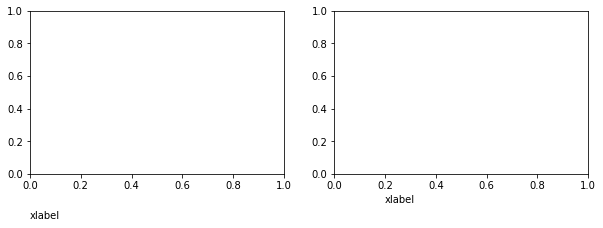

In [74]:
# 观察labelpad和loc参数的使用效果
fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,2)
axes[0].set_xlabel('xlabel',labelpad=20,loc='left')

# loc参数仅能提供粗略的位置调整，如果想要更精确的设置标签的位置，可以使用position参数+horizontalalignment参数来定位
# position由一个元组过程，第一个元素0.2表示x轴标签在x轴的位置，第二个元素对于xlabel其实是无意义的，随便填一个数都可以
# horizontalalignment='left'表示左对齐，这样设置后x轴标签就能精确定位在x=0.2的位置处
axes[1].set_xlabel('xlabel', position=(0.2, _), horizontalalignment='left');

### 4.title和suptitle - 子图和画布的标题

title的调用方式为`Axes.set_title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)`  
其中label为子图标签的内容，`fontdict`,`loc`,`**kwargs`和之前小节相同不重复介绍  
`pad`是指标题偏离图表顶部的距离，默认为6    
`y`是title所在子图垂向的位置。默认值为1，即title位于子图的顶部。  

suptitle的调用方式为`figure.suptitle(t, **kwargs)`  
其中`t`为画布的标题内容

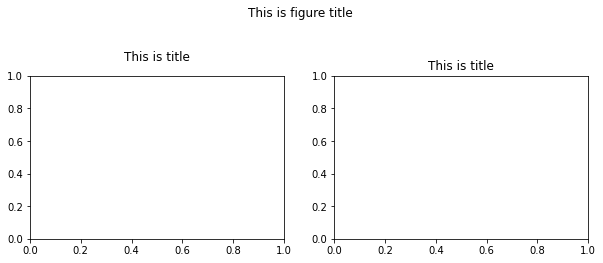

In [96]:
# 观察pad参数的使用效果
fig = plt.figure(figsize=(10,3))
fig.suptitle('This is figure title',y=1.2) # 通过参数y设置高度
axes = fig.subplots(1,2)
axes[0].set_title('This is title',pad=15)
axes[1].set_title('This is title',pad=6);

### 5.annotate - 子图的注解

annotate的调用方式为`Axes.annotate(text, xy, *args, **kwargs)`  
其中`text`为注解的内容，  
`xy`为注解箭头指向的坐标，  
其他常用的参数包括：  
`xytext`为注解文字的坐标，  
`xycoords`用来定义xy参数的坐标系，   
`textcoords`用来定义xytext参数的坐标系，  
`arrowprops`用来定义指向箭头的样式  
annotate的参数非常复杂，这里仅仅展示一个简单的例子，更多参数可以查看[官方文档中的annotate介绍](https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation)

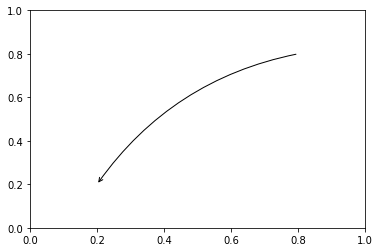

In [110]:
fig = plt.figure()
ax = fig.add_subplot()
ax.annotate("",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2")
            );

 ### 6.字体的属性设置
 字体设置一般有全局字体设置和自定义局部字体设置两种方法。

  [为方便在图中加入合适的字体，可以尝试了解中文字体的英文名称,该链接告诉了常用中文的英文名称](https://www.cnblogs.com/chendc/p/9298832.html)

In [113]:
#该block讲述如何在matplotlib里面，修改字体默认属性，完成全局字体的更改。
plt.rcParams['font.sans-serif'] = ['SimSun']    # 指定默认字体为新宋体。
plt.rcParams['axes.unicode_minus'] = False      # 解决保存图像时 负号'-' 显示为方块和报错的问题。

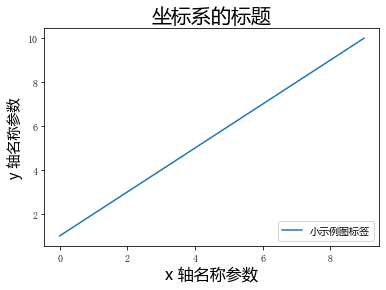

In [115]:
#局部字体的修改方法1
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, label='小示例图标签')

# 直接用字体的名字
plt.xlabel('x 轴名称参数', fontproperties='Microsoft YaHei', fontsize=16)         # 设置x轴名称，采用微软雅黑字体
plt.ylabel('y 轴名称参数', fontproperties='Microsoft YaHei', fontsize=14)         # 设置Y轴名称
plt.title('坐标系的标题',  fontproperties='Microsoft YaHei', fontsize=20)         # 设置坐标系标题的字体
plt.legend(loc='lower right', prop={"family": 'Microsoft YaHei'}, fontsize=10) ;   # 小示例图的字体设置

## 二、Tick上的文本

设置tick（刻度）和ticklabel（刻度标签）也是可视化中经常需要操作的步骤，matplotlib既提供了自动生成刻度和刻度标签的模式（默认状态），同时也提供了许多让使用者灵活设置的方式。

### 1.简单模式
可以使用axis的`set_ticks`方法手动设置标签位置，使用axis的`set_ticklabels`方法手动设置标签格式

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)

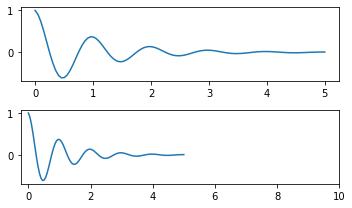

In [6]:
# 使用axis的set_ticks方法手动设置标签位置的例子，该案例中由于tick设置过大，所以会影响绘图美观，不建议用此方式进行设置tick
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
axs[1].xaxis.set_ticks(np.arange(0., 10.1, 2.))
plt.show()

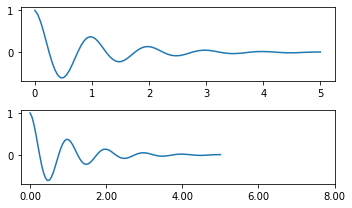

In [7]:
# 使用axis的set_ticklabels方法手动设置标签格式的例子
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
ticks = np.arange(0., 8.1, 2.)
tickla = [f'{tick:1.2f}' for tick in ticks]
axs[1].xaxis.set_ticks(ticks)
axs[1].xaxis.set_ticklabels(tickla)
plt.show()

<a list of 14 Line2D ticklines objects>


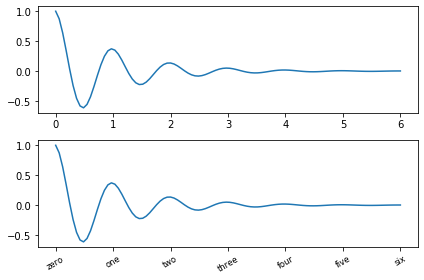

In [8]:
#一般绘图时会自动创建刻度，而如果通过上面的例子使用set_ticks创建刻度可能会导致tick的范围与所绘制图形的范围不一致的问题。
#所以在下面的案例中，axs[1]中set_xtick的设置要与数据范围所对应，然后再通过set_xticklabels设置刻度所对应的标签
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(6, 4), tight_layout=True)
x1 = np.linspace(0.0, 6.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
axs[0].plot(x1, y1)
axs[0].set_xticks([0,1,2,3,4,5,6])

axs[1].plot(x1, y1)
axs[1].set_xticks([0,1,2,3,4,5,6])#要将x轴的刻度放在数据范围中的哪些位置
axs[1].set_xticklabels(['zero','one', 'two', 'three', 'four', 'five','six'],#设置刻度对应的标签
                   rotation=30, fontsize='small')#rotation选项设定x刻度标签倾斜30度。
axs[1].xaxis.set_ticks_position('bottom')#set_ticks_position()方法是用来设置刻度所在的位置，常用的参数有bottom、top、both、none
print(axs[1].xaxis.get_ticklines())
plt.show()

### 2.Tick Locators and Formatters

除了上述的简单模式，还可以使用`Tick Locators and Formatters`完成对于刻度位置和刻度标签的设置。
其中[Axis.set_major_locator](https://matplotlib.org/api/_as_gen/matplotlib.axis.Axis.set_major_locator.html#matplotlib.axis.Axis.set_major_locator)和[Axis.set_minor_locator](https://matplotlib.org/api/_as_gen/matplotlib.axis.Axis.set_minor_locator.html#matplotlib.axis.Axis.set_minor_locator)方法用来设置标签的位置，[Axis.set_major_formatter](https://matplotlib.org/api/_as_gen/matplotlib.axis.Axis.set_major_formatter.html#matplotlib.axis.Axis.set_major_formatter)和[Axis.set_minor_formatter](https://matplotlib.org/api/_as_gen/matplotlib.axis.Axis.set_minor_formatter.html#matplotlib.axis.Axis.set_minor_formatter)方法用来设置标签的格式。这种方式的好处是不用显式地列举出刻度值列表。

set_major_formatter和set_minor_formatter这两个formatter格式命令可以接收字符串格式（matplotlib.ticker.StrMethodFormatter）或函数参数（matplotlib.ticker.FuncFormatter）来设置刻度值的格式 。

#### a) Tick Formatters

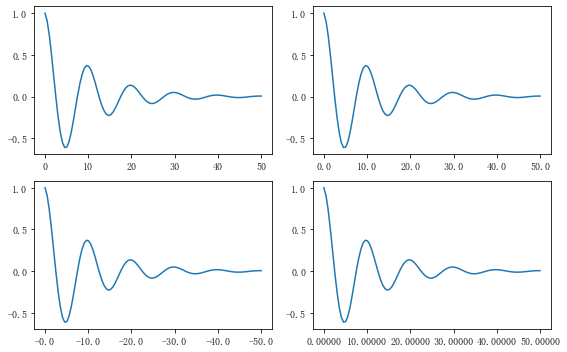

In [17]:
# 接收字符串格式的例子
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

formatter = matplotlib.ticker.FormatStrFormatter('%1.1f')
axs[0, 1].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('-%1.1f')
axs[1, 0].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('%1.5f')
axs[1, 1].xaxis.set_major_formatter(formatter)

plt.show()

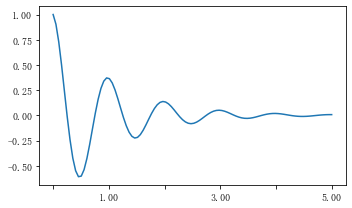

In [18]:
# 接收函数的例子
def formatoddticks(x, pos):
    """Format odd tick positions."""
    if x % 2:
        return f'{x:1.2f}'
    else:
        return ''

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.plot(x1, y1)
ax.xaxis.set_major_formatter(formatoddticks)
plt.show()

#### b) Tick Locators 


在普通的绘图中，我们可以直接通过上图的set_ticks进行设置刻度的位置，缺点是需要自己指定或者接受matplotlib默认给定的刻度。当需要更改刻度的位置时，matplotlib给了常用的几种locator的类型。如果要绘制更复杂的图，可以先设置locator的类型，然后通过axs.xaxis.set_major_locator(locator)绘制即可  
locator=plt.MaxNLocator(nbins=7)  
locator=plt.FixedLocator(locs=[0,0.5,1.5,2.5,3.5,4.5,5.5,6])#直接指定刻度所在的位置  
locator=plt.AutoLocator()#自动分配刻度值的位置  
locator=plt.IndexLocator(offset=0.5, base=1)#面元间距是1，从0.5开始  
locator=plt.MultipleLocator(1.5)#将刻度的标签设置为1.5的倍数  
locator=plt.LinearLocator(numticks=5)#线性划分5等分，4个刻度  

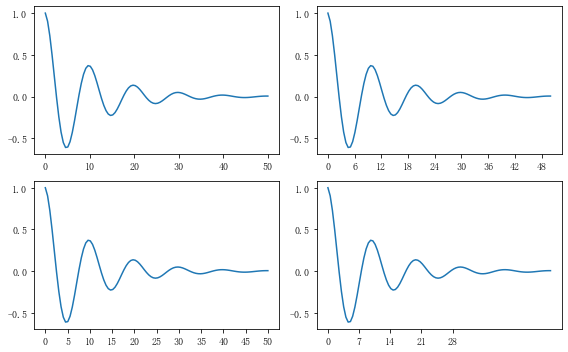

In [19]:
# 接收各种locator的例子
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

locator = matplotlib.ticker.AutoLocator()
axs[0, 0].xaxis.set_major_locator(locator)

locator = matplotlib.ticker.MaxNLocator(nbins=10)
axs[0, 1].xaxis.set_major_locator(locator)


locator = matplotlib.ticker.MultipleLocator(5)
axs[1, 0].xaxis.set_major_locator(locator)


locator = matplotlib.ticker.FixedLocator([0,7,14,21,28])
axs[1, 1].xaxis.set_major_locator(locator)

plt.show()

 此外`matplotlib.dates` 模块还提供了特殊的设置日期型刻度格式和位置的方式

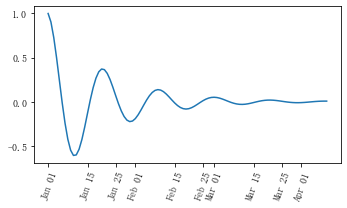

In [20]:
import matplotlib.dates as mdates
import datetime
# 特殊的日期型locator和formatter
locator = mdates.DayLocator(bymonthday=[1,15,25])
formatter = mdates.DateFormatter('%b %d')

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
time = [base + datetime.timedelta(days=x) for x in range(len(x1))]
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70)
plt.show()

**其他进阶案例**

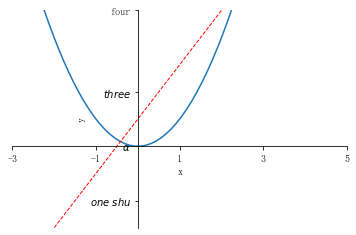

In [22]:
#这个案例中展示了如何进行坐标轴的移动，如何更改刻度值的样式
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-3,3,50)
y1 = 2*x+1
y2 = x**2
plt.figure()
plt.plot(x,y2)
plt.plot(x,y1,color='red',linewidth=1.0,linestyle = '--')
plt.xlim((-3,5))
plt.ylim((-3,5))
plt.xlabel('x')
plt.ylabel('y')
new_ticks1 = np.linspace(-3,5,5)
plt.xticks(new_ticks1)
plt.yticks([-2,0,2,5],[r'$one\ shu$',r'$\alpha$',r'$three$',r'four'])
'''
上一行代码是将y轴上的小标改成文字,其中，空格需要增加\，即'\ ',$可将格式更改成数字模式，如果需要输入数学形式的α，则需要用\转换，即\alpha
如果使用面向对象的命令进行画图，那么下面两行代码可以实现与 plt.yticks([-2,0,2,5],[r'$one\ shu$',r'$\alpha$',r'$three$',r'four']) 同样的功能
axs.set_yticks([-2,0,2,5])
axs.set_yticklabels([r'$one\ shu$',r'$\alpha$',r'$three$',r'four'])
'''
ax = plt.gca()#gca = 'get current axes' 获取现在的轴
'''
ax = plt.gca()是获取当前的axes，其中gca代表的是get current axes。
fig=plt.gcf是获取当前的figure，其中gcf代表的是get current figure。

许多函数都是对当前的Figure或Axes对象进行处理，
例如plt.plot()实际上会通过plt.gca()获得当前的Axes对象ax，然后再调用ax.plot()方法实现真正的绘图。

而在本例中则可以通过ax.spines方法获得当前顶部和右边的轴并将其颜色设置为不可见
然后将左边轴和底部的轴所在的位置重新设置
最后再通过set_ticks_position方法设置ticks在x轴或y轴的位置，本示例中因所设置的bottom和left是ticks在x轴或y轴的默认值，所以这两行的代码也可以不写
'''
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position(('data',0))
ax.spines['bottom'].set_position(('data',0))#axes 百分比
ax.xaxis.set_ticks_position('bottom')   #设置ticks在x轴的位置
ax.yaxis.set_ticks_position('left')     #设置ticks在y轴的位置
plt.show()

## 三、legend（图例）

图例的设置会使用一些常见术语，为了清楚起见，这些术语在此处进行说明：
##### legend entry（图例条目）
图例有一个或多个legend entries组成。一个entry由一个key和一个label组成。
##### legend key（图例键）
每个 legend label左面的colored/patterned marker（彩色/图案标记）
##### legend label（图例标签）
描述由key来表示的handle的文本
##### legend handle（图例句柄）
用于在图例中生成适当图例条目的原始对象

以下面这个图为例，右侧的方框中的共有两个legend entry；两个legend key，分别是一个蓝色和一个黄色的legend key；两个legend label，一个名为‘Line up’和一个名为‘Line Down’的legend label

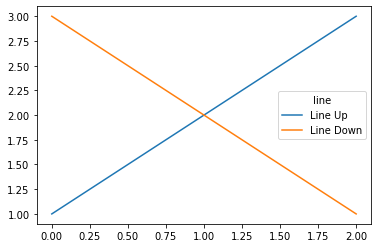

常用的几个参数：

(1)设置图列位置

plt.legend(loc='upper center') 等同于plt.legend(loc=9)



| |  |  |
| ------------------------------------------------------- | ------------------------------------------ | ------------------------------------------------------------ |
|  0: ‘best'  
1: ‘upper right'  
2: ‘upper left'  
3: ‘lower left'                                                        |   
4: ‘lower right'  
5: ‘right'  
6: ‘center left'                                           |    
7: ‘center right'  
8: ‘lower center'  
9: ‘upper center'  
10: ‘center'                                                           |  


(2)设置图例字体大小

fontsize : int or float or {‘xx-small’, ‘x-small’, ‘small’, ‘medium’, ‘large’, ‘x-large’, ‘xx-large’}

(3)设置图例边框及背景

plt.legend(loc='best',frameon=False) #去掉图例边框  
plt.legend(loc='best',edgecolor='blue') #设置图例边框颜色  
plt.legend(loc='best',facecolor='blue') #设置图例背景颜色,若无边框,参数无效

(4)设置图例标题

legend = plt.legend(["CH", "US"], title='China VS Us')

(5)设置图例名字及对应关系

legend = plt.legend([p1, p2], ["CH", "US"])

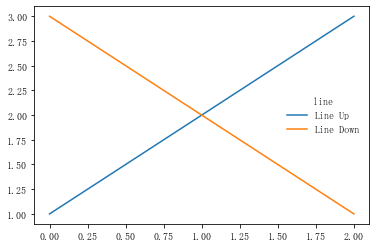

In [23]:
line_up, = plt.plot([1, 2, 3], label='Line 2')
line_down, = plt.plot([3, 2, 1], label='Line 1')
plt.legend([line_up, line_down], ['Line Up', 'Line Down'],loc=5, title='line',frameon=False)#loc参数设置图例所在的位置，title设置图例的标题，frameon参数将图例边框给去掉

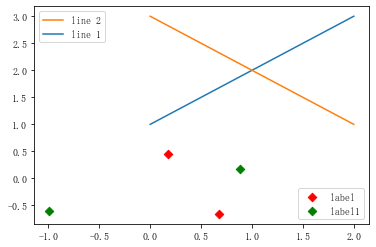

In [24]:
#这个案例是显示多图例legend
import matplotlib.pyplot as plt
import numpy as np
x = np.random.uniform(-1, 1, 4)
y = np.random.uniform(-1, 1, 4)
p1, = plt.plot([1,2,3])
p2, = plt.plot([3,2,1])
l1 = plt.legend([p2, p1], ["line 2", "line 1"], loc='upper left')
 
p3 = plt.scatter(x[0:2], y[0:2], marker = 'D', color='r')
p4 = plt.scatter(x[2:], y[2:], marker = 'D', color='g')
# 下面这行代码由于添加了新的legend，所以会将l1从legend中给移除
plt.legend([p3, p4], ['label', 'label1'], loc='lower right', scatterpoints=1)
# 为了保留之前的l1这个legend，所以必须要通过plt.gca()获得当前的axes，然后将l1作为单独的artist
plt.gca().add_artist(l1)

## 思考题
- 请尝试使用两种模仿画出下面的图表(重点是柱状图上的标签)，本文学习的text方法和matplotlib自带的柱状图标签方法bar_label
![](https://img-blog.csdnimg.cn/99bc6e007eb34fc09015589d56c6eafc.png)